In [31]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

\begin{align}
\frac{pol_{bound}}{len}\ & = pol_{free} * k_{bind}\\
\frac{pol_{bound}}{len}\ & = (pol_{tot} - pol_{bound}) * k_{bind} \\
\frac{pol_{bound}}{len}\ & = pol_{tot}k_{bind} - pol_{bound}k_{bind} \\
\frac{pol_{bound}}{len}\ + pol_{bound}k_{bind} & = pol_{tot}k_{bind} \\
pol_{bound}(\frac{1}{len}\ + k_{bind}) & = pol_{tot}k_{bind} \\
pol_{bound} & = \frac{pol_{tot}k_{bind}}{\frac{1}{len}\ + k_{bind}}\ \\
\end{align} 

In [32]:
# simulation parameters
POL_TOT = 10 # total polymerases in the simulation
LEN = 450 # length of gene

In [33]:
# ave. bound polymerases in simulations at steady-state
df = pd.read_csv("../processed_data/polymerases.csv")

In [34]:
# analytical solution for steady-state bound polymerases
def f(rate):
    AVOGADRO = 6.02214076e23
    VOLUME = 8e-16
    meso_rate = rate / (AVOGADRO * VOLUME)
    return (POL_TOT * meso_rate) / ((1 / LEN) + meso_rate)

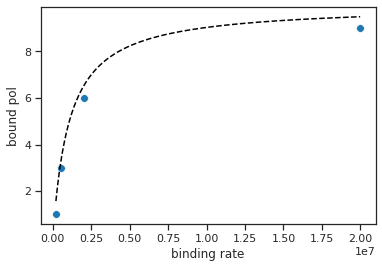

In [36]:
r1 = np.arange(2e5, 2e7, 1e4)
sns.set_theme(style="ticks", palette=None)
sns.scatterplot(data=df, x = "rate", y = "pol", s = 60)
plt.xlabel("binding rate")
plt.ylabel("bound pol")
plt.plot(r1, f(r1), 'k--')